# 근사화

## 회귀법
- 최소 자승 회귀법은 간단의 함수의 근사부터 잡음이 있거나 정렬되지 않은 함수의 근사까지 다양하게 응용 가능
- 기저 함수 활용 가능

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def f(x):
    return np.sin(x) + 0.5 * x

In [8]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
    plt.xlabel(axlabels[0])
    plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [10]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

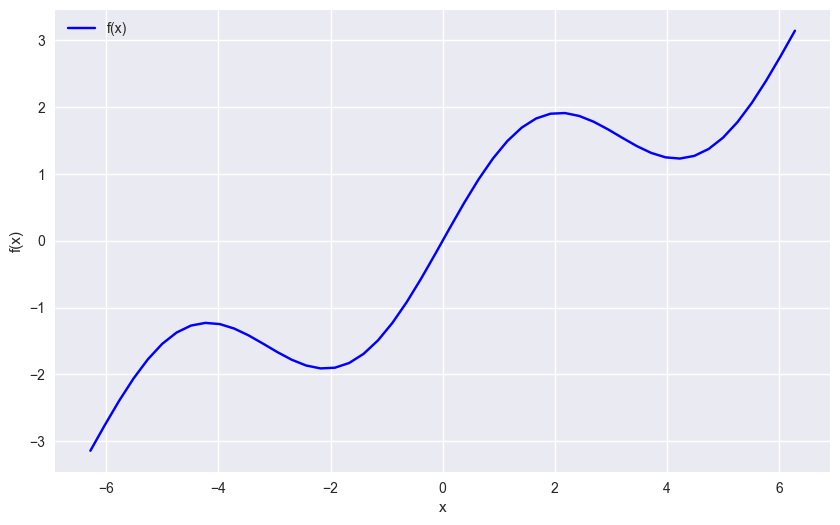

In [11]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

**1차 회귀식 fit & 예측값 도출**

In [12]:
res = np.polyfit(x, f(x), deg=1, full=True)

res

(array([ 4.28841952e-01, -4.31775426e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

In [20]:
ry = np.polyval(res[0], x)

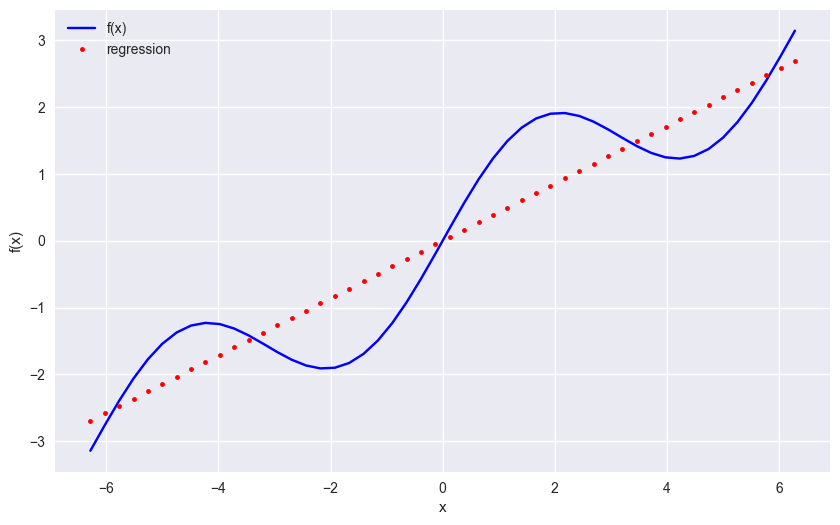

In [21]:
create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [22]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [25]:
x = np.linspace(0, 10, 20) 
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)

In [26]:
Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()

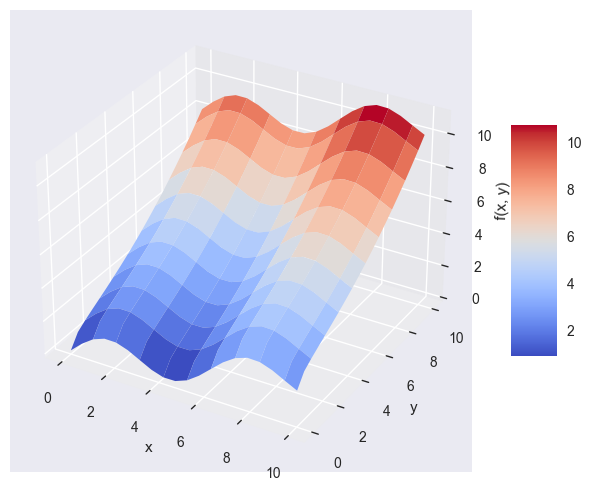

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm', linewidth=0.5, antialiased=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

**다차원 데이터 회귀 기저 함수 집합 활용**

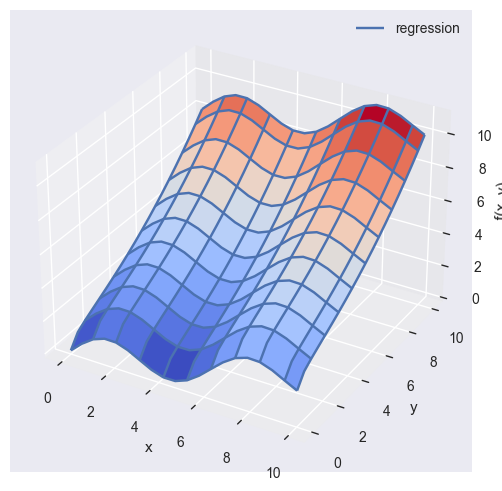

In [30]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)    
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]
RZ = np.dot(matrix, reg).reshape((20, 20))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm', linewidth=0.5, antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2, label='regression')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)

## 보간법
- 다차원 적용 어려움
- x 차원의 정렬된 관측점이 주어졌을 때 두 이웃하는 관측점 사이의 자료를 계산 보간 함수 제작
- 각 관측점에서 미분 가능한 함수여야 한다
- 정확도 보간 > 회귀
- 정렬, 잡음X, 다차원 문제 적용X

**3차 스플라인 보간**

In [8]:
import scipy.interpolate as spi

x = np.linspace(-2 * np.pi, 2 * np.pi, 25)
xd = np.linspace(1.0, 3.0, 50)

def f(x):
    return np.sin(x) + 0.5 * x

ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'], ['f(x)', 'interpolation'], ['x', 'f(x)'])

NameError: name 'create_plot' is not defined

# VaR

- 직관적
- 테일 리스크 파악 어려움
- 어떤 확률적인 신뢰도하에서 특정 시간 내에 발생할 수 있는 화폐로 환산한 포트폴리오나 단일 포지션의 손실 가능 금액  
ex) 백만 달러짜리 주식 포지션의 99% 신뢰도 30일 VaR 값이 5만 달러  
-> 30일 동안의 기간내 손실 99% 확률로 5만 달러를 넘지 않는다.

**기하 브라운 운동 모형**

Text(0, 0.5, 'frequency')

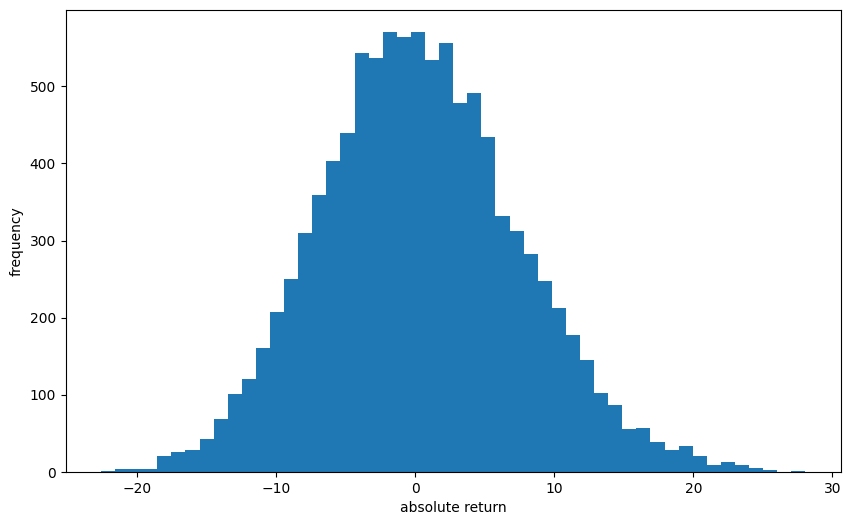

In [4]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30/365.
I = 10000

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(I))

R_gbm = np.sort(ST - S0)

plt.figure(figsize=(10, 6))
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')

In [14]:
import scipy.stats as scs

percs = [0.01, 0.1, 1.0, 2.5, 5.0, 10.0]
gbm_var = scs.scoreatpercentile(R_gbm, percs)
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, gbm_var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           21.023
           99.90           18.990
           99.00           15.125
           97.50           12.926
           95.00           10.818
           90.00            8.583


**점프 확산 모형**

In [10]:
import math
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75  
mu = -0.6  
delta = 0.25
M = 50
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)  

Text(0, 0.5, 'frequency')

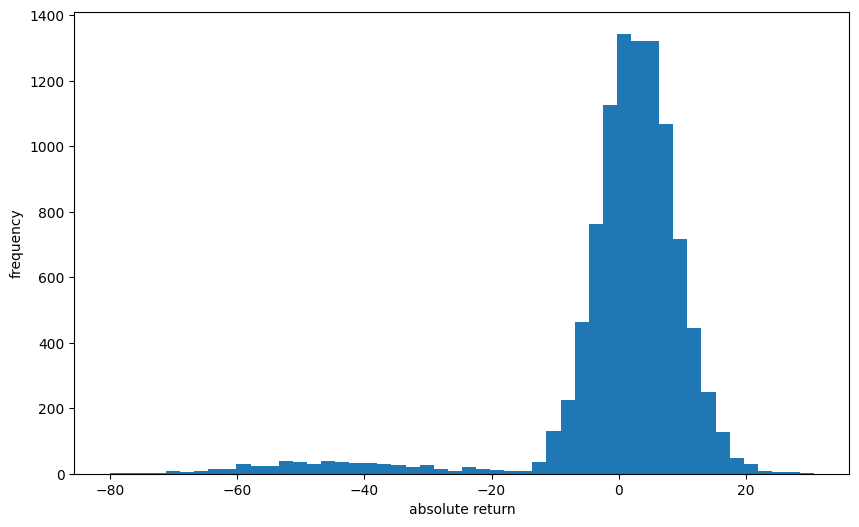

In [12]:
import numpy.random as npr  

dt = 30. / 365 / M
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * math.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

R_jd = np.sort(S[-1] - S0)

plt.figure(figsize=(10, 6))
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')

In [15]:
percs = [0.01, 0.1, 1.0, 2.5, 5.0, 10.0]
jd_var = scs.scoreatpercentile(R_jd, percs)
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, jd_var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           76.902
           99.90           69.834
           99.00           56.478
           97.50           46.087
           95.00           26.332
           90.00            6.637


**값으로는 테일리스크를 포착하지 못하는 문제 발생**

In [17]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

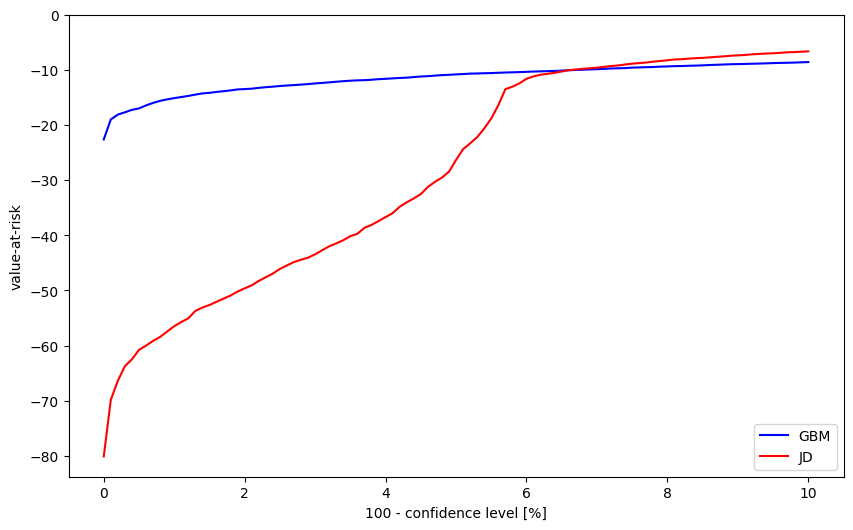

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.ylim(ymax=0.0);